1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

the z score is: 3.0


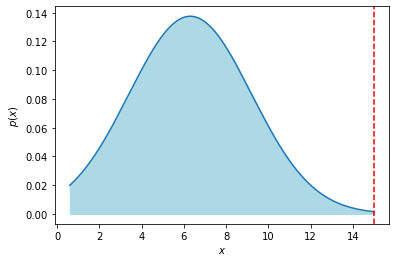

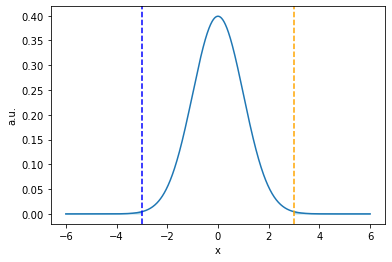

p-value = 0.0026997960632601965


In [8]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

x0=15
mu=6.3
sigma=2.9 #Sigma can be from 0 to 3 for the Z score to be larger than 3
Z = abs(x0 - mu) / sigma
w=mu-x0
print("the z score is:",Z)
x = np.linspace(mu - w, w + mu + 3, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

xs = np.linspace(-6, +6, 1000)
ts = stats.norm.pdf(xs)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(Z), color='lightblue')
plt.axvline(Z, linestyle='--', color='orange')
plt.axvline(-Z, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("x")
plt.show()

pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [12]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma = sqrt((np.std(pre)**2+np.std(post)**2)/2)
pre_mean = np.mean(pre)
post_mean = np.mean(post)

T = (pre_mean-post_mean)/(sigma*sqrt(2/(n-1)))
n = len(post) 


#Calculatetest statistics
print("T =", T)


#Calculating p-value
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
print("since the p-value",pvalue," is less than 0.05/2 we agree that the change in blood pressure is significant")

T = -3.786997938137628
p-value = 0.004302464132864607
since the p-value 0.004302464132864607  is less than 0.05/2 we agree that the change in blood pressure is significant


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

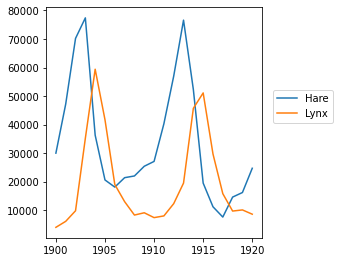

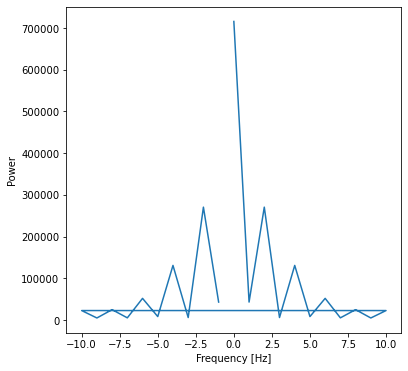

Peak frequency: 2.0


In [27]:
from scipy import fftpack

data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T

#Doing the plot for Hare and Lynx
plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes)
plt.legend(('Hare', 'Lynx'), loc = (1.05, 0.5))
plt.show()

sig_fft = fftpack.fft(hares)
power = np.abs(sig_fft)
sample_freq = fftpack.fftfreq(len(hares), d=1/len(hares))

#Plotting the frequency
plt.figure(figsize=(6, 6))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.show()

pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
powes = power[pos_mask]

#Getting the peak frequency
peak_freq = freqs[powes.argmax()]
print("Peak frequency:", peak_freq)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

Text(0.5, 1.0, 'Reconstructed Image')

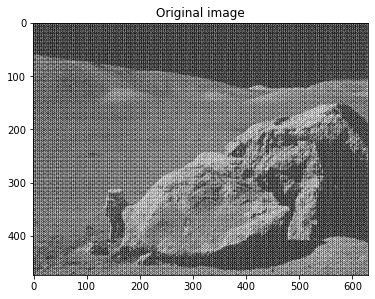

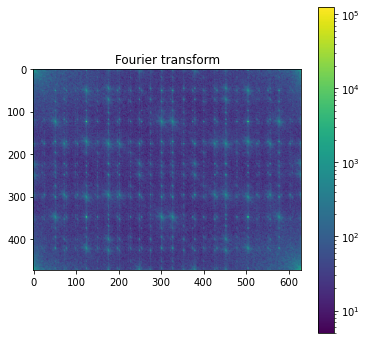

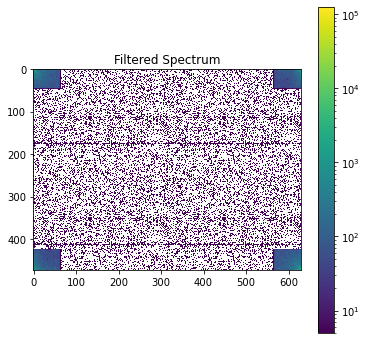

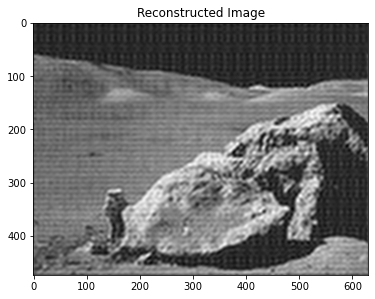

In [28]:
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.fftpack as fp
from matplotlib.colors import LogNorm

#Original image
im = plt.imread("moonlanding.png").astype(float)

plt.figure(figsize=(6, 6))
plt.imshow(im, plt.cm.gray)
plt.title('Original image')

im_fft = fftpack.fft2(im)


def plot_spectrum(im_fft):
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

#Doing the Fourier spectrum
plt.figure(figsize=(6, 6))
plot_spectrum(im_fft)
plt.title('Fourier transform')

keep_fraction = 0.1

im_fft2 = im_fft.copy()

r, c = im_fft2.shape

im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

#Showing the image with the filtered spectrum
plt.figure(figsize=(6, 6))
plot_spectrum(im_fft2)
plt.title('Filtered Spectrum')

im_new = fftpack.ifft2(im_fft2).real

#Showing the reverse  fourier to reconstruct the image
plt.figure(figsize=(6, 6))
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')